In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import plotly.express as px
import word_cloud_stream as wcs
from config import config

#### Rio Ferdinand Stream Data:
- The collection was started on 09-05-2021 at 13:00 with the keywords “Rio Ferdinand” and “@rioferdy5” and is still running.
- Rio_stream database is created to store the stream data. 
- The DB has 137,253 tweets on the dates between 2021-05-09 and 2021-06-19.
- The streaming data has been classified using ANTI_BLACK+AB300-distilbert-base-uncased-20210616112713 classifier.

In [2]:
engine_stream = create_engine(f'postgresql://{config.REMOTE_USERNAME}:{config.PASSWORD}@\
{config.REMOTE_IP_ADDRESS}/{config.DATABASE_NAME_S}')

In [3]:
# df_stream_results = pd.read_csv("../data/rio_stream-output.csv")

In [4]:
# df_stream_results.head()

In [5]:
# df_stream_results = df_stream_results.rename(columns={"id": "status_id"})

In [6]:
# df_stream_results.head()

In [7]:
# CREATE TABLE ab_classifiers (
#     ab_classifier_id serial PRIMARY KEY,
#     id bigint NOT NULL,
#     text text,
#     score float NOT NULL,
#     FOREIGN KEY (id)
#     REFERENCES tweets (id)
# )

In [8]:
# df_stream_results.to_sql('ab_classifiers', engine_stream, if_exists='append', index=False, chunksize=100)

In [9]:
df_stream_ab = pd.read_sql_query("""select tw.status_id, tw.text, tw.created_at, us.screen_name, ab.score
                        from tweets tw
                        join ab_classifiers ab ON ab.status_id = tw.status_id
                        join users us ON us.user_id = tw.user_id""", con =engine_stream)

In [10]:
df_stream_ab.head()

,status_id,text,created_at,screen_name,score
0,1393989990204510215,U ok @rioferdy5,2021-05-16,banned_dr,0.131961
1,1394001200799002629,Kate Ferdinand and husband Rio moan about thei...,2021-05-16,MirrorCeleb,0.001832
2,1393612156252295171,Rio Ferdinand responds as BT Sport reminds him...,2021-05-15,ManUtdLatestCom,0.021242
3,1393612573010915329,@rioferdy5 https://t.co/GgMfvuCwAz,2021-05-15,RichaSh65625737,0.004209
4,1393613045046423558,The atmosphere is bursting at the seams!!!!! 🔥...,2021-05-15,Michaelkun8,0.001566


### Taking threshold as >.50

In [11]:
df_stream_ab['type_50']=np.where(df_stream_ab['score'] > 0.50, 'yes', 'no')

### How many tweets we classified as anti-black? (threshold as >.50)

In [12]:
type_counts_ab_50 = df_stream_ab['type_50'].value_counts()
type_counts_ab_50

no     124068
yes      3933
Name: type_50, dtype: int64

In [13]:
type_counts_ab_50["yes"]/df_stream_ab.shape[0]*100

3.0726322450605856

3.072% of mentions at Rio are found to be antagonistic and/or offensive based on our anti-Black classifier. 

### Daily frequency of tweets mentioning Rio (threshold as >.50)

In [14]:
daily_counts_stream_ab_50 = df_stream_ab.groupby(['type_50', 'created_at']).size().reset_index()
daily_counts_stream_ab_50 = daily_counts_stream_ab_50.rename(columns= {0:"counts_50"})
daily_counts_stream_ab_50.head()

,type_50,created_at,counts_50
0,no,2021-05-09,3165
1,no,2021-05-10,3371
2,no,2021-05-11,4212
3,no,2021-05-12,5333
4,no,2021-05-13,2790


In [15]:
daily_counts_stream_ab_wide_50 = daily_counts_stream_ab_50.pivot(columns='type_50', values='counts_50', index = 'created_at').reset_index()
daily_counts_stream_ab_wide_50['total'] = daily_counts_stream_ab_wide_50.loc[:,["yes", "no"]].sum( axis = 1)
daily_counts_stream_ab_wide_50.head()

type_50,created_at,no,yes,total
0,2021-05-09,3165,67,3232
1,2021-05-10,3371,51,3422
2,2021-05-11,4212,53,4265
3,2021-05-12,5333,53,5386
4,2021-05-13,2790,44,2834


In [47]:
fig_daily_counts_stream_ab_50 =px.line(daily_counts_stream_ab_wide_50, x="created_at",
            y=daily_counts_stream_ab_wide_50.columns,
            title='Daily frequency of tweets mentioning Rio Streaming Data (hate tweets >.50 threshold)',
            color_discrete_map ={
                "yes": "red",
                "no": "green",
                "total": "goldenrod"}
            )

fig_daily_counts_stream_ab_50.show()

### Daily Percentage of antagnostic (Anti-black) replies at Rio (threshold as >.50)


In [48]:
daily_counts_stream_ab_wide_50["stream_ab_ratio_50"] = daily_counts_stream_ab_wide_50['yes']/daily_counts_stream_ab_wide_50['total']


In [49]:
fig_stream_daily_ratio_ab_50 =px.line(daily_counts_stream_ab_wide_50,
                          x="created_at",
                          y="stream_ab_ratio_50",
                          title='Daily Percentage of antagnostic (Anti-black) replies at Rio for Streaming Data (threshold as >.50)',
                          color_discrete_sequence =["red"]

            )
fig_stream_daily_ratio_ab_50.show()

### Taking threshold as >.80

In [19]:
df_stream_ab['type_80']=np.where(df_stream_ab['score'] > 0.8, 'yes', 'no')

### How many tweets we classified as anti-black? (threshold as >.80)

In [20]:
type_counts_ab_80 = df_stream_ab['type_80'].value_counts()
type_counts_ab_80

no     126417
yes      1584
Name: type_80, dtype: int64

In [21]:
type_counts_ab_80["yes"]/df_stream_ab.shape[0]*100

1.2374903321067805

1.237% of mentions at Rio are found to be antagonistic and/or offensive based on our anti-Black classifier. 

### Daily frequency of tweets mentioning Rio (threshold as >.80)

In [22]:
daily_counts_stream_ab_80 = df_stream_ab.groupby(['type_80', 'created_at']).size().reset_index()
daily_counts_stream_ab_80 = daily_counts_stream_ab_80.rename(columns= {0:"counts_80"})
daily_counts_stream_ab_80.head()

,type_80,created_at,counts_80
0,no,2021-05-09,3203
1,no,2021-05-10,3393
2,no,2021-05-11,4244
3,no,2021-05-12,5366
4,no,2021-05-13,2813


In [23]:
daily_counts_stream_ab_wide_80 = daily_counts_stream_ab_80.pivot(columns='type_80', values='counts_80', index = 'created_at').reset_index()
daily_counts_stream_ab_wide_80['total'] = daily_counts_stream_ab_wide_80.loc[:,["yes", "no"]].sum( axis = 1)
daily_counts_stream_ab_wide_80.head()

type_80,created_at,no,yes,total
0,2021-05-09,3203,29,3232
1,2021-05-10,3393,29,3422
2,2021-05-11,4244,21,4265
3,2021-05-12,5366,20,5386
4,2021-05-13,2813,21,2834


In [50]:
fig_daily_counts_stream_ab_80 =px.line(daily_counts_stream_ab_wide_80, x="created_at",
            y=daily_counts_stream_ab_wide_80.columns,
            title='Daily frequency of tweets mentioning Rio Streaming Data (hate tweets >.80 threshold)',
            color_discrete_map ={
                "yes": "red",
                "no": "green",
                "total": "goldenrod"}
            )

fig_daily_counts_stream_ab_80.show()

### Daily Percentage of antagnostic (Anti-black) replies at Rio (threshold as >.80)

In [53]:
daily_counts_stream_ab_wide_80["stream_ab_ratio_80"] = daily_counts_stream_ab_wide_80['yes']/daily_counts_stream_ab_wide_80['total']


In [54]:
fig_stream_daily_ratio_ab_80 =px.line(daily_counts_stream_ab_wide_80,
                          x="created_at",
                          y="stream_ab_ratio_80",
                          title='Daily Percentage of antagnostic (Anti-black) replies at Rio for Streaming Data (threshold as >.80)',
                          color_discrete_sequence =["red"]

            )
fig_stream_daily_ratio_ab_80.show()

### Frequent Mentioners of Rio in streaming data

In [27]:
df_stream_ab_no_rio = df_stream_ab[df_stream_ab['screen_name']!= 'rioferdy5']

In [28]:
stream_user_counts_no_rio = df_stream_ab_no_rio["screen_name"].value_counts().reset_index()

In [29]:
stream_mention_norio_df = pd.DataFrame(stream_user_counts_no_rio[0:20]).rename({"index":"screen_name", "screen_name": "mention_count"}, axis=1)

In [30]:
stream_mention_norio_df.head()

,screen_name,mention_count
0,QMac784,175
1,ForzaJustice,132
2,cpusaad01,130
3,LFC_bot_v1,128
4,BPete1970,125


In [31]:
fig_stream = px.bar(stream_mention_norio_df, 
             x='mention_count', 
             y='screen_name',
             title = "Top 20 accounts mentioned Rio from streaming data",
             hover_data=['screen_name', 'mention_count'], 
             color='mention_count', 
             color_continuous_scale=px.colors.sequential.Viridis,
             labels={'count':'mention_count'}, height=600, width=800)
fig_stream.update_layout(yaxis_categoryorder = 'total ascending')
fig_stream.show()

### Top accounts mentioning Rio with antagonistic content

In [32]:
df_hate_mentioners_stream = df_stream_ab_no_rio[df_stream_ab_no_rio['type_80']=='yes']

In [33]:
df_hate_mentioners_stream.head()

,status_id,text,created_at,screen_name,score,type_50,type_80
91,1393310433390497798,@rioferdy5 Sit down you daft twat.,2021-05-14,KeithLFC6,0.992756,yes,yes
121,1394417006888333312,@GNev2 @Carra23 @rioferdy5 @GaryLineker @laura...,2021-05-17,willy_edwards,0.994185,yes,yes
411,1391747799042113536,@rioferdy5 @WayneRooney Hanging out the back o...,2021-05-10,JohnyLopez1,0.960925,yes,yes
643,1397679344584175616,You don off cloth?,2021-05-26,ManLykMyk,0.946576,yes,yes
649,1397680882790633474,@milesxaddy Nah @rioferdy5 just said it,2021-05-26,Footballjustin_,0.903378,yes,yes


In [34]:
hate_mentioners_stream_count = df_hate_mentioners_stream["screen_name"].value_counts().reset_index()

In [35]:
hate_mentioners_stream_count_20 = pd.DataFrame(hate_mentioners_stream_count[0:20]).rename({"index":"screen_name", "screen_name": "hate_mention_count"}, axis=1)
hate_mentioners_stream_count_20

,screen_name,hate_mention_count
0,JoeBangles11,9
1,BPete1970,6
2,Kford86,5
3,Apisadmirer,4
4,IraqLobster8,4
5,GoblinoEl,3
6,rorufufufu,3
7,Si_G87,3
8,follow1djemba,3
9,JustJohn12,3


In [36]:
fig_hate_mentioners_stream = px.bar(hate_mentioners_stream_count_20, 
             x='hate_mention_count', 
             y='screen_name',
             title="The Top Account replying to Rio with antagonistic content (Streaming Data)",                     
             hover_data=['screen_name', 'hate_mention_count'], 
             color='hate_mention_count', 
             color_continuous_scale=px.colors.sequential.Viridis,
             labels={'count':'hate_mention_count'}, height=600, width=800)
fig_hate_mentioners_stream.update_layout(yaxis_categoryorder = 'total ascending')
fig_hate_mentioners_stream.show()

### The Average of Hateful Tweets Before and After Rio's tweet.

In [37]:
daily_counts_hate_tweets = df_hate_mentioners_stream.groupby(['created_at']).size().reset_index()
daily_counts_hate_tweets = daily_counts_hate_tweets.rename(columns= {0:"counts"})
daily_counts_hate_tweets.head()

,created_at,counts
0,2021-05-09,29
1,2021-05-10,29
2,2021-05-11,21
3,2021-05-12,20
4,2021-05-13,21


In [38]:
daily_counts_hate_tweets['created_at_dt'] = pd.to_datetime(daily_counts_hate_tweets['created_at'])

In [39]:
daily_counts_hate_tweets['after_stunt']=np.where(daily_counts_hate_tweets['created_at_dt'] >'2021-05-14', 1, 0)

In [40]:
daily_counts_hate_tweets.head()

,created_at,counts,created_at_dt,after_stunt
0,2021-05-09,29,2021-05-09,0
1,2021-05-10,29,2021-05-10,0
2,2021-05-11,21,2021-05-11,0
3,2021-05-12,20,2021-05-12,0
4,2021-05-13,21,2021-05-13,0


In [68]:
df_stunt_daily_counts = daily_counts_hate_tweets[daily_counts_hate_tweets['created_at_dt'] < '2021-05-21']

In [69]:
df_stunt_daily_counts

,created_at,counts,created_at_dt,after_stunt
0,2021-05-09,29,2021-05-09,0
1,2021-05-10,29,2021-05-10,0
2,2021-05-11,21,2021-05-11,0
3,2021-05-12,20,2021-05-12,0
4,2021-05-13,21,2021-05-13,0
5,2021-05-14,17,2021-05-14,0
6,2021-05-15,28,2021-05-15,1
7,2021-05-16,5,2021-05-16,1
8,2021-05-17,57,2021-05-17,1
9,2021-05-18,7,2021-05-18,1


In [75]:
df_stunt_daily_counts.groupby('after_stunt')['counts'].mean()

after_stunt
0    22.833333
1    19.666667
Name: counts, dtype: float64

In [76]:
df_stunt_daily_counts['mean']=df_stunt_daily_counts.groupby('after_stunt')['counts'].transform('mean')

<ipython-input-76-2003d50ec54e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
df_stunt_daily_counts

,created_at,counts,created_at_dt,after_stunt,mean
0,2021-05-09,29,2021-05-09,0,22.833333
1,2021-05-10,29,2021-05-10,0,22.833333
2,2021-05-11,21,2021-05-11,0,22.833333
3,2021-05-12,20,2021-05-12,0,22.833333
4,2021-05-13,21,2021-05-13,0,22.833333
5,2021-05-14,17,2021-05-14,0,22.833333
6,2021-05-15,28,2021-05-15,1,19.666667
7,2021-05-16,5,2021-05-16,1,19.666667
8,2021-05-17,57,2021-05-17,1,19.666667
9,2021-05-18,7,2021-05-18,1,19.666667


In [72]:
df_stunt_daily_counts['after_stunt'].value_counts()

0    6
1    6
Name: after_stunt, dtype: int64

In [130]:
fig = px.line(df_stunt_daily_counts, 
              x="created_at", 
              y=['counts', 'mean'],
              title = "Frequency of Hateful Tweets Before and After Rio's tweet",
              color_discrete_map ={
                  "mean":"blue",
                  "counts": "green"}
             )
fig.add_vline(x='2021-05-14', 
              line_width=3, 
              line_color = 'red')
fig.add_vrect(x0="2021-05-14", x1="2021-05-14", 
              annotation_text="Rio's tweet", annotation_position="top left",
              annotation=dict(font_size=13, font_family="Times New Roman"),
              fillcolor="red", opacity=0.25, line_width=0)
fig.show()

### Visualising the top keywords for hateful tweets

In [45]:
df_stream_wordcloud = df_stream_ab[(df_stream_ab['type_80']=='yes')][['text',"score", "screen_name", "created_at"]]
df_stream_wordcloud = wcs.clean_data(df_stream_wordcloud)

/Users/serenayozalp/Documents/work/HateLab/rio_project/rio_viz/notebooks/word_cloud_stream.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.

/Users/serenayozalp/Documents/work/HateLab/rio_project/rio_viz/notebooks/word_cloud_stream.py:10: FutureWarning:

The default value of regex will change from True to False in a future version.

/Users/serenayozalp/Documents/work/HateLab/rio_project/rio_viz/notebooks/word_cloud_stream.py:11: FutureWarning:

The default value of regex will change from True to False in a future version.

/Users/serenayozalp/Documents/work/HateLab/rio_project/rio_viz/notebooks/word_cloud_stream.py:12: FutureWarning:

The default value of regex will change from True to False in a future version.



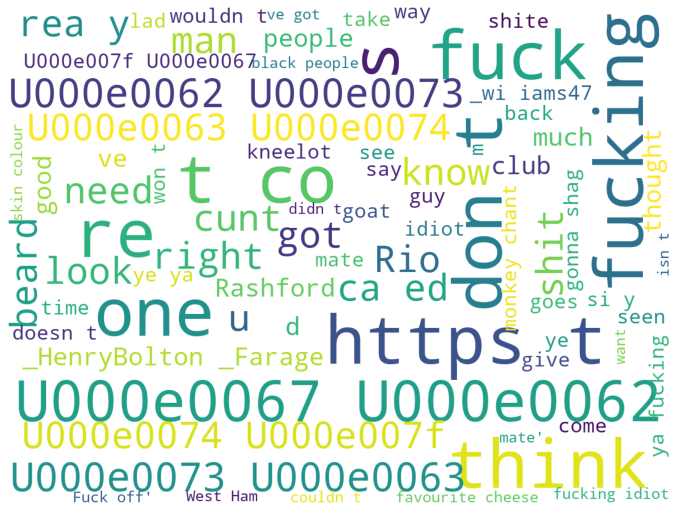

In [46]:
wcs.show_wordcloud(df_stream_wordcloud['tweet_clean'].to_list())

##### Future Possible Work

- Creating a time series chart shows the tweet count before and after Rio's tweets.
- Deep diving the days getting over 10% daily percentage of antagnostic (Anti-black) replies at Rio
- Word cloud can be improved